# Importing libraries

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
# from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST Dataset

In [4]:
MNIST_Image_data = mnist.load_data()

In [5]:
(x_train, y_train),(x_test, y_test)= MNIST_Image_data
x_train.shape, y_train.shape, x_test.shape, y_train.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (60000,))

**Have a look at sample image**

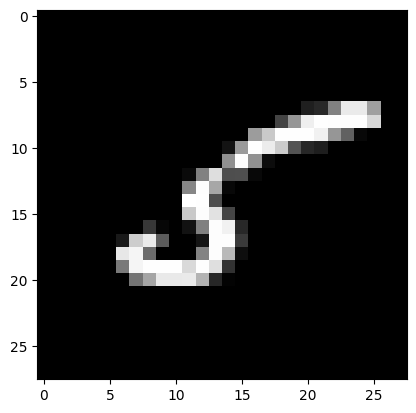

In [6]:
plt.imshow(x_train[11], cmap= plt.get_cmap('gray'))

## Lets built MNIST digit classification using CNN

Reshape the data

In [7]:
# Building the input vector from the 28 X 28 image pixels.
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1).astype('float32')
X_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [8]:
X_train.shape, X_train.dtype, X_test.shape, X_test.dtype

((60000, 28, 28, 1), dtype('float32'), (10000, 28, 28, 1), dtype('float32'))

#### Normalize the data





In [9]:
X_train = X_train / 255   # Scaling values from (0,255) -> (0,1)
X_test = X_test / 255     # Scaling values from (0,255) -> (0,1)

In [10]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## One-hot encoding for labels by using Keras numpy utilities`

In [11]:
# Before one hot encoding 
y_train, y_train.shape

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8), (60000,))

In [13]:
# # After onehot encoding
# num_classes = 10
# Y_train= np_utils.to_categorical(y_train,num_classes)
# Y_test = np_utils.to_categorical(y_test, num_classes)

from keras.utils import to_categorical  # Correct import for one-hot encoding

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)  # Use to_categorical directly
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [14]:
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

# Building the CNN model

In [15]:
model = Sequential()
# Add Convolution Layers. Here we are adding only 1 convolution layer. If you want, can add more.
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
#Flatten the output of convolution layer
model.add(Flatten())
#Add hidden layer. here I am ading only one hidden layer.
model.add(Dense(784, activation='relu'))
# Output layer
model.add(Dense(num_classes, activation='softmax'))

C:\Users\kalim\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 25)     │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16900)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 784)            │    13,250,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,258,484 (50.58 MB)

 Trainable params: 13,258,484 (50.58 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# compiling the sequential model
model.compile(loss= 'categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 99s 208ms/step - accuracy: 0.9004 - loss: 0.3173 - val_accuracy: 0.9802 - val_loss: 0.0649
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 103s 219ms/step - accuracy: 0.9872 - loss: 0.0414 - val_accuracy: 0.9831 - val_loss: 0.0477
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 113s 241ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9846 - val_loss: 0.0461
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 101s 214ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9852 - val_loss: 0.0478
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 209ms/step - accuracy: 0.9982 - loss: 0.0065 - val_accuracy: 0.9859 - val_loss: 0.0519
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 214ms/step - accuracy: 0.9986 - loss: 0.0053 - val_accuracy: 0.9857 - val_loss: 0.0546
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9862 - val_loss: 0.0484
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - accuracy: 0.9982 - los

#Summary

* Amazing, we achived ~99.8% accuracy and 98.5% validation accuracy.
* MNIST is a beginner-friendly dataset in computer vision. It’s easy to score 90%+ on validation by using a CNN model with only one convolution layer.